<h1> Time Series Forecasting in Python </h1>

By Marco Peixeiro, Updated 12/11/2023

https://www.manning.com/books/time-series-forecasting-in-python-book
https://github.com/marcopeix/TimeSeriesForecastingInPython
<h3> Part IV: Automatic Forecasting At Scale </h3>
<h3> Chapter 19: Prophet </h3>    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

## 19.3 Basic forecasting with Prophet 

In [4]:
df = pd.read_csv('../data/daily_min_temp.csv')

df.head()

Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

In [5]:
df.tail()

Date  Temp
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

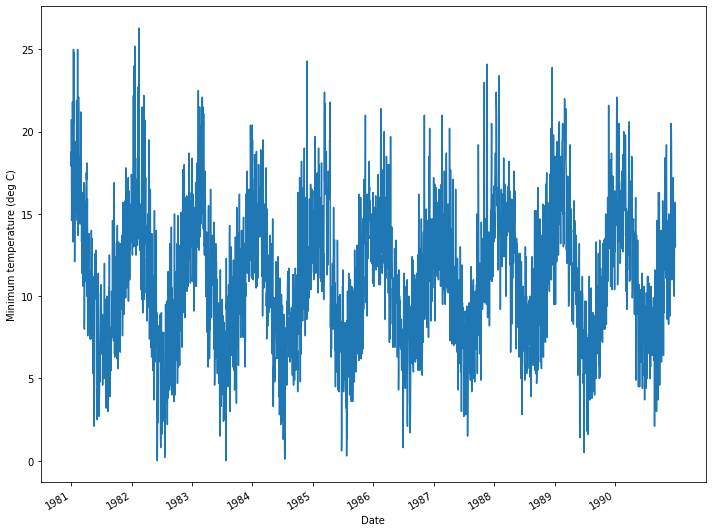

In [6]:
fig, ax = plt.subplots()

ax.plot(df['Temp'])
ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

plt.xticks(np.arange(0, 3649, 365), np.arange(1981, 1991, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F01_peixeiro.png', dpi=300)

## Basic forecasting with Prophet

In [7]:
df.columns = ['ds', 'y']
df.head()

ds     y
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

In [8]:
train = df[:-365]
test = df[-365:]

In [9]:
m = Prophet()

In [10]:
m.fit(train);

21:43:11 - cmdstanpy - INFO - Chain [1] start processing
21:43:11 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365)

In [12]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

ds       yhat  yhat_lower  yhat_upper
3285 1990-01-01  14.884466   11.545185   18.347904
3286 1990-01-02  15.010759   11.666846   18.639425
3287 1990-01-03  15.087091   11.448479   18.739487
3288 1990-01-04  14.995057   11.356812   18.302389
3289 1990-01-05  15.065256   11.380886   18.758341

In [13]:
forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3645 1990-12-27  11.411879   10.855910   17.903888    11.326232    11.500952   
3646 1990-12-28  11.411808   10.940996   18.084650    11.325483    11.501276   
3647 1990-12-29  11.411737   10.868342   18.197513    11.324850    11.501481   
3648 1990-12-30  11.411666   10.775622   18.025782    11.324310    11.501687   
3649 1990-12-31  11.411595   11.194920   18.085677    11.323805    11.501884   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
3645        3.043798              3.043798              3.043798 -0.026479   
3646        3.121058              3.121058              3.121058 -0.009998   
3647        3.145077              3.145077              3.145077 -0.048856   
3648        3.069451              3.069451              3.069451 -0.188706   
3649        3.366646              3.366646              3.366646  0.043732   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
3645     -0.026479     -0.026479  3.070278      3.070278      3.070278   
3646     -0.009998     -0.009998  3.131056      3.131056      3.131056   
3647     -0.048856     -0.048856  3.193933      3.193933      3.193933   
3648     -0.188706     -0.188706  3.258156      3.258156      3.258156   
3649      0.043732      0.043732  3.322915      3.322915      3.322915   

      multiplicative_terms  multiplicative_terms_lower  \
3645                   0.0                         0.0   
3646                   0.0                         0.0   
3647                   0.0                         0.0   
3648                   0.0                         0.0   
3649                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
3645                         0.0  14.455677  
3646                         0.0  14.532866  
3647                         0.0  14.556814  
3648                         0.0  14.481116  
3649                         0.0  14.778241

In [14]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

ds     y       yhat  yhat_lower  yhat_upper
3285  1990-01-01  14.8  14.884466   11.545185   18.347904
3286  1990-01-02  13.3  15.010759   11.666846   18.639425
3287  1990-01-03  15.6  15.087091   11.448479   18.739487
3288  1990-01-04  14.5  14.995057   11.356812   18.302389
3289  1990-01-05  14.3  15.065256   11.380886   18.758341

In [15]:
test['baseline'] = train['y'][-365:].values
test.head()

ds     y       yhat  yhat_lower  yhat_upper  baseline
3285  1990-01-01  14.8  14.884466   11.545185   18.347904      14.3
3286  1990-01-02  13.3  15.010759   11.666846   18.639425      17.4
3287  1990-01-03  15.6  15.087091   11.448479   18.739487      18.5
3288  1990-01-04  14.5  14.995057   11.356812   18.302389      16.8
3289  1990-01-05  14.3  15.065256   11.380886   18.758341      11.5

In [16]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

1.9371509317016211
2.8673972602739726


In [17]:
test.iloc[59]

ds            1990-03-01
y                   19.3
yhat           15.469065
yhat_lower     12.147077
yhat_upper     19.036965
baseline            20.4
Name: 3344, dtype: object

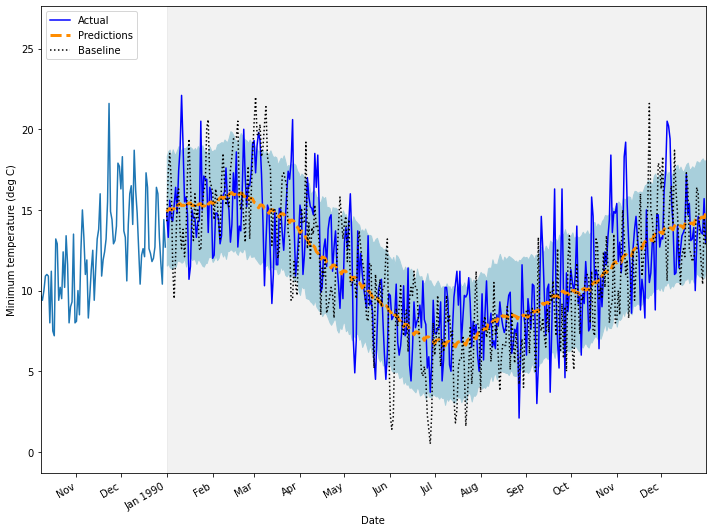

In [18]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

ax.axvspan(3285, 3649, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(
    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(3200, 3649)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F03_peixeiro.png', dpi=300)

## 19.4 Exploring Prophet's advanced functionalities

### 19.4.1 Visualization capabilities

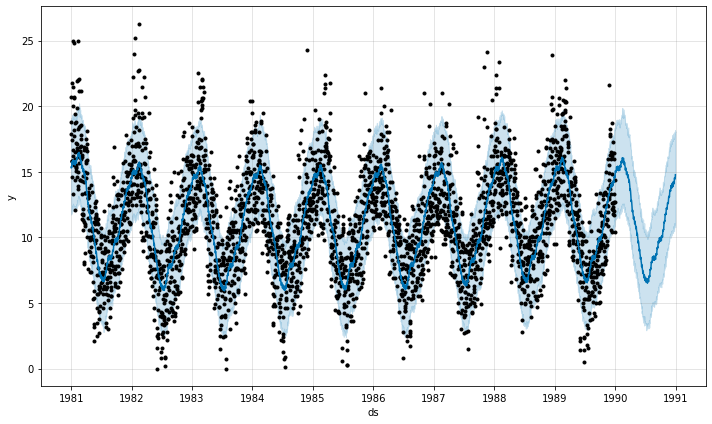

In [19]:
fig1 = m.plot(forecast)

plt.savefig('figures/CH19_F04_peixeiro.png', dpi=300)

#### Plot components 

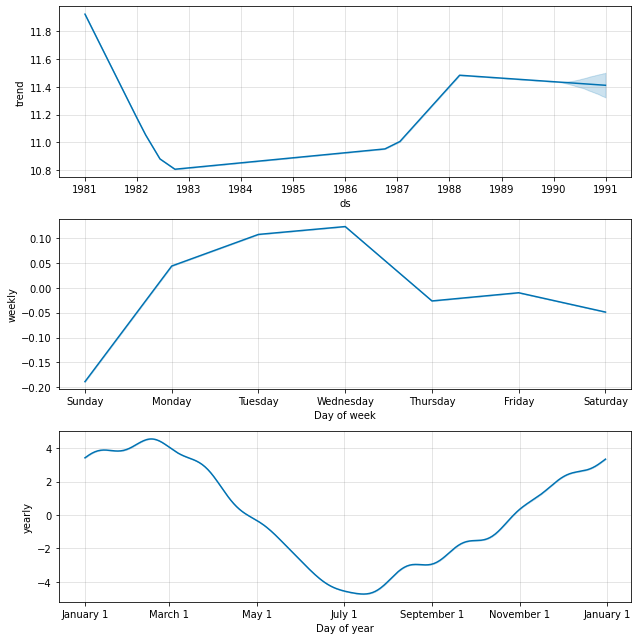

In [20]:
fig2 = m.plot_components(forecast)

plt.savefig('figures/CH19_F05_peixeiro.png', dpi=300)

#### Show trend changepoints 

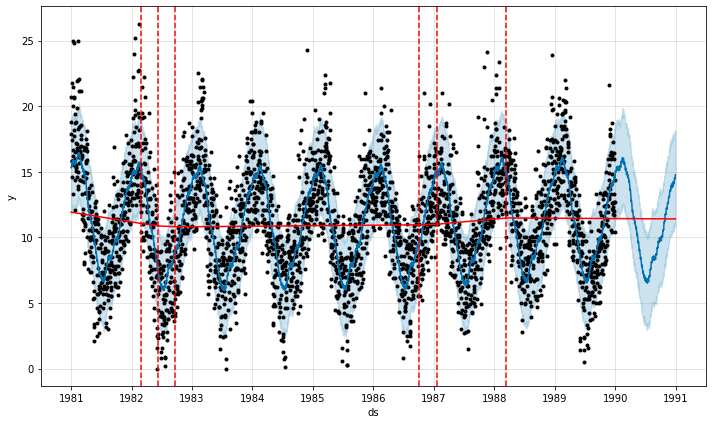

In [22]:
from prophet.plot import add_changepoints_to_plot

fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)

plt.savefig('figures/CH19_F08_peixeiro.png', dpi=300)

#### Plot seasonal components 

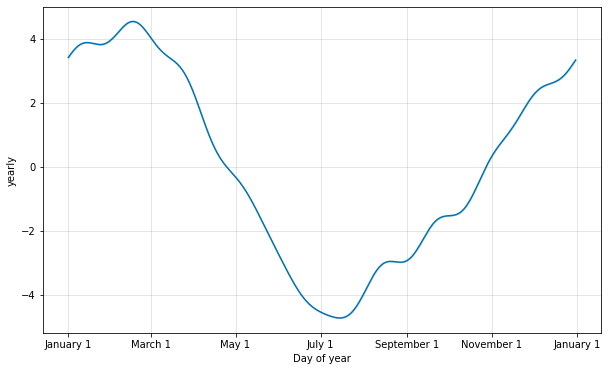

In [23]:
from prophet.plot import plot_yearly, plot_weekly

fig4 = plot_yearly(m)

plt.savefig('figures/CH19_F06_peixeiro.png', dpi=300)

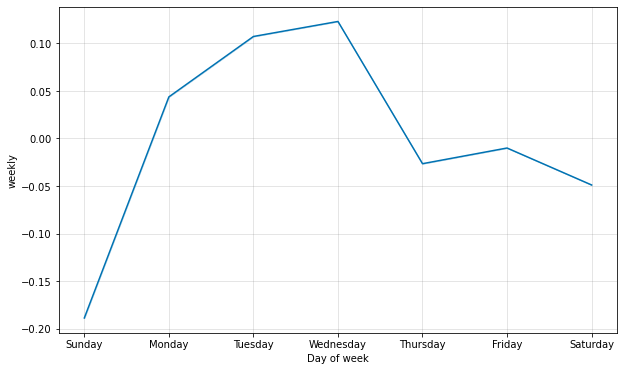

In [24]:
fig5 = plot_weekly(m)

21:44:04 - cmdstanpy - INFO - Chain [1] start processing
21:44:04 - cmdstanpy - INFO - Chain [1] done processing


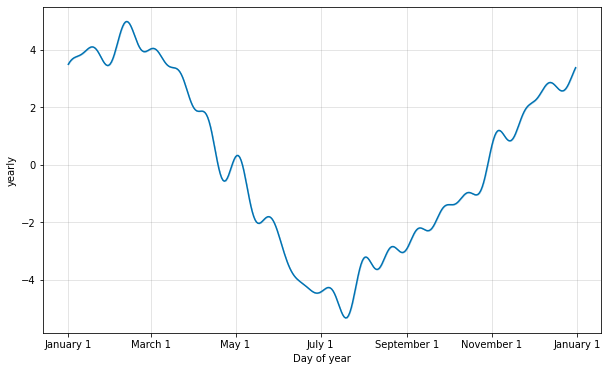

In [25]:
m2 = Prophet(yearly_seasonality=20).fit(train)

fig6 = plot_yearly(m2)

plt.savefig('figures/CH19_F07_peixeiro.png', dpi=300)

### 19.4.2 Cross-validation and performance metrics

In [26]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')

df_cv.head()

ds       yhat  yhat_lower  yhat_upper     y     cutoff
0 1983-02-02  15.161683   11.522932   18.891635  17.3 1983-02-01
1 1983-02-03  14.823618   11.256372   18.398477  13.0 1983-02-01
2 1983-02-04  15.219484   11.420368   18.718708  16.0 1983-02-01
3 1983-02-05  15.211232   12.028639   18.780661  14.9 1983-02-01
4 1983-02-06  15.258906   11.423761   18.791825  16.2 1983-02-01

In [27]:
from prophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv, rolling_window=0)

df_perf.head()

horizon        mse      rmse       mae     mdape     smape  coverage
0  1 days   6.342255  2.518383  2.069347  0.147400  0.197952  0.846154
1  2 days   4.657629  2.158154  1.742629  0.140278  0.161260  0.846154
2  3 days  10.017954  3.165115  2.659482  0.146600  0.371797  0.769231
3  4 days   8.659980  2.942784  2.375017  0.197291  0.328860  0.769231
4  5 days   8.254290  2.873028  2.570270  0.196214  0.301351  0.615385

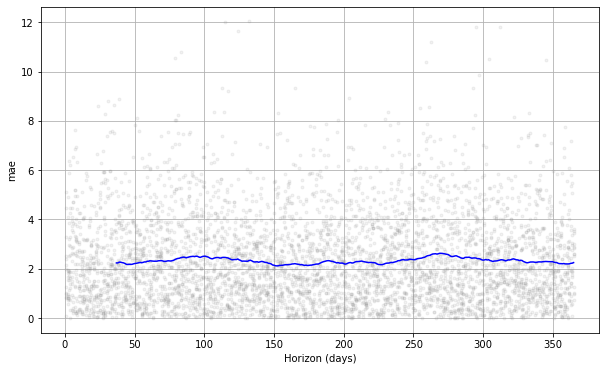

In [28]:
from prophet.plot import plot_cross_validation_metric

fig7 = plot_cross_validation_metric(df_cv, metric='mae')

plt.savefig('figures/CH19_F10_peixeiro.png', dpi=300)

### 19.4.3 Hyperparameter tuning 

In [29]:
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

maes = []

for params in all_params:
    m = Prophet(**params).fit(train)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes

tuning_results

21:44:35 - cmdstanpy - INFO - Chain [1] start processing
21:44:35 - cmdstanpy - INFO - Chain [1] done processing
21:44:41 - cmdstanpy - INFO - Chain [1] start processing
21:44:41 - cmdstanpy - INFO - Chain [1] done processing
21:44:47 - cmdstanpy - INFO - Chain [1] start processing
21:44:47 - cmdstanpy - INFO - Chain [1] done processing
21:44:53 - cmdstanpy - INFO - Chain [1] start processing
21:44:53 - cmdstanpy - INFO - Chain [1] done processing
21:45:00 - cmdstanpy - INFO - Chain [1] start processing
21:45:00 - cmdstanpy - INFO - Chain [1] done processing
21:45:05 - cmdstanpy - INFO - Chain [1] start processing
21:45:06 - cmdstanpy - INFO - Chain [1] done processing
21:45:11 - cmdstanpy - INFO - Chain [1] start processing
21:45:12 - cmdstanpy - INFO - Chain [1] done processing
21:45:17 - cmdstanpy - INFO - Chain [1] start processing
21:45:18 - cmdstanpy - INFO - Chain [1] done processing
21:45:23 - cmdstanpy - INFO - Chain [1] start processing
21:45:24 - cmdstanpy - INFO - Chain [1]

changepoint_prior_scale  seasonality_prior_scale       mae
0                     0.001                     0.01  2.306425
1                     0.001                     0.10  2.296503
2                     0.001                     1.00  2.342035
3                     0.001                    10.00  2.340870
4                     0.010                     0.01  2.239709
5                     0.010                     0.10  2.277349
6                     0.010                     1.00  2.276803
7                     0.010                    10.00  2.285956
8                     0.100                     0.01  2.727911
9                     0.100                     0.10  2.349227
10                    0.100                     1.00  2.346664
11                    0.100                    10.00  2.346459
12                    0.500                     0.01  4.723564
13                    0.500                     0.10  2.395860
14                    0.500                     1.00  2.459817
15                    0.500                    10.00  2.453358

In [30]:
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


## 19.5 Implementing a robust forecasting process with Prophet 

### 19.5.1 Forecasting project: Predicting the popularity of "chocolate" searches on Google 

Source: https://trends.google.com/trends/explore?date=all&geo=US&q=chocolate

In [31]:
df = pd.read_csv('../data/monthly_chocolate_search_usa.csv')
df.head()

month  chocolate
0  2004-01         35
1  2004-02         48
2  2004-03         34
3  2004-04         33
4  2004-05         33

In [32]:
df.tail()

month  chocolate
211  2021-08         45
212  2021-09         45
213  2021-10         44
214  2021-11         54
215  2021-12         74

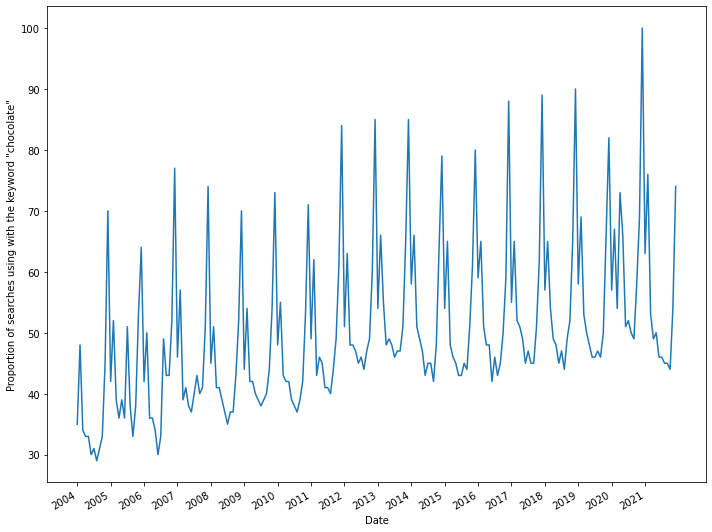

In [33]:
fig, ax = plt.subplots()

ax.plot(df['chocolate'])
ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F13_peixeiro.png', dpi=300)

In [34]:
df.columns = ['ds', 'y']
df.head()

ds   y
0  2004-01  35
1  2004-02  48
2  2004-03  34
3  2004-04  33
4  2004-05  33

In [35]:
from pandas.tseries.offsets import MonthEnd

df['ds'] = pd.to_datetime(df['ds']) + MonthEnd(1)

df.head()

ds   y
0 2004-01-31  35
1 2004-02-29  48
2 2004-03-31  34
3 2004-04-30  33
4 2004-05-31  33

In [36]:
train = df[:-12]
test = df[-12:]

In [37]:
train.tail()

ds    y
199 2020-08-31   50
200 2020-09-30   49
201 2020-10-31   58
202 2020-11-30   69
203 2020-12-31  100

In [40]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

cutoffs = pd.date_range(start='2009-01-31', end='2019-01-31', freq='12M')

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

21:56:58 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing
21:56:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/11 [00:00<?, ?it/s]

21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing
21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing
21:57:01 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:04 - cmdstanpy - INFO - Chain [1] start processing
21:57:04 - cmdstanpy - INFO - Chain [1] done processing
21:57:04 - cmdstanpy - INFO - Chain [1] start processing
21:57:04 - cmdstanpy - INFO - Chain [1] done processing
21:57:05 - cmdstanpy - INFO - Chain [1] start processing
21:57:05 - cmdstanpy - INFO - Chain [1] done processing
21:57:05 - cmdstanpy - INFO - Chain [1] start processing
21:57:05 - cmdstanpy - INFO - Chain [1] done processing
21:57:05 - cmdstanpy - INFO - Chain [1] start processing
21:57:05 - cmdstanpy - INFO - Chain [1] done processing
21:57:06 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1] done processing
21:57:06 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1] done processing
21:57:06 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1] done processing
21:57:06 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:07 - cmdstanpy - INFO - Chain [1] start processing
21:57:08 - cmdstanpy - INFO - Chain [1] done processing
21:57:08 - cmdstanpy - INFO - Chain [1] start processing
21:57:08 - cmdstanpy - INFO - Chain [1] done processing
21:57:08 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing
21:57:10 - cmdstanpy - INFO - Chain [1] start processing
21:57:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:11 - cmdstanpy - INFO - Chain [1] start processing
21:57:11 - cmdstanpy - INFO - Chain [1] done processing
21:57:11 - cmdstanpy - INFO - Chain [1] start processing
21:57:11 - cmdstanpy - INFO - Chain [1] done processing
21:57:11 - cmdstanpy - INFO - Chain [1] start processing
21:57:12 - cmdstanpy - INFO - Chain [1] done processing
21:57:12 - cmdstanpy - INFO - Chain [1] start processing
21:57:12 - cmdstanpy - INFO - Chain [1] done processing
21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:13 - cmdstanpy - INFO - Chain [1] done processing
21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:13 - cmdstanpy - INFO - Chain [1] done processing
21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:13 - cmdstanpy - INFO - Chain [1] done processing
21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:13 - cmdstanpy - INFO - Chain [1] done processing
21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:14 - cmdstanpy - INFO - Chain [1] start processing
21:57:14 - cmdstanpy - INFO - Chain [1] done processing
21:57:14 - cmdstanpy - INFO - Chain [1] start processing
21:57:14 - cmdstanpy - INFO - Chain [1] done processing
21:57:15 - cmdstanpy - INFO - Chain [1] start processing
21:57:15 - cmdstanpy - INFO - Chain [1] done processing
21:57:15 - cmdstanpy - INFO - Chain [1] start processing
21:57:15 - cmdstanpy - INFO - Chain [1] done processing
21:57:15 - cmdstanpy - INFO - Chain [1] start processing
21:57:15 - cmdstanpy - INFO - Chain [1] done processing
21:57:15 - cmdstanpy - INFO - Chain [1] start processing
21:57:15 - cmdstanpy - INFO - Chain [1] done processing
21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:16 - cmdstanpy - INFO - Chain [1] done processing
21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:16 - cmdstanpy - INFO - Chain [1] done processing
21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:17 - cmdstanpy - INFO - Chain [1] start processing
21:57:17 - cmdstanpy - INFO - Chain [1] done processing
21:57:17 - cmdstanpy - INFO - Chain [1] start processing
21:57:17 - cmdstanpy - INFO - Chain [1] done processing
21:57:17 - cmdstanpy - INFO - Chain [1] start processing
21:57:18 - cmdstanpy - INFO - Chain [1] done processing
21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:18 - cmdstanpy - INFO - Chain [1] done processing
21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:18 - cmdstanpy - INFO - Chain [1] done processing
21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:18 - cmdstanpy - INFO - Chain [1] done processing
21:57:19 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing
21:57:19 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing
21:57:19 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:20 - cmdstanpy - INFO - Chain [1] start processing
21:57:20 - cmdstanpy - INFO - Chain [1] done processing
21:57:20 - cmdstanpy - INFO - Chain [1] start processing
21:57:20 - cmdstanpy - INFO - Chain [1] done processing
21:57:20 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
21:57:22 - cmdstanpy - INFO - Chain [1] start processing
21:57:22 - cmdstanpy - INFO - Chain [1] done processing
21:57:22 - cmdstanpy - INFO - Chain [1] start processing
21:57:22 - cmdstanpy - INFO - Chain [1] done processing
21:57:22 - cmdstanpy - INFO - Chain [1] start processing
21:57:22 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:23 - cmdstanpy - INFO - Chain [1] start processing
21:57:23 - cmdstanpy - INFO - Chain [1] done processing
21:57:23 - cmdstanpy - INFO - Chain [1] start processing
21:57:23 - cmdstanpy - INFO - Chain [1] done processing
21:57:23 - cmdstanpy - INFO - Chain [1] start processing
21:57:24 - cmdstanpy - INFO - Chain [1] done processing
21:57:24 - cmdstanpy - INFO - Chain [1] start processing
21:57:24 - cmdstanpy - INFO - Chain [1] done processing
21:57:24 - cmdstanpy - INFO - Chain [1] start processing
21:57:24 - cmdstanpy - INFO - Chain [1] done processing
21:57:24 - cmdstanpy - INFO - Chain [1] start processing
21:57:24 - cmdstanpy - INFO - Chain [1] done processing
21:57:25 - cmdstanpy - INFO - Chain [1] start processing
21:57:25 - cmdstanpy - INFO - Chain [1] done processing
21:57:25 - cmdstanpy - INFO - Chain [1] start processing
21:57:25 - cmdstanpy - INFO - Chain [1] done processing
21:57:25 - cmdstanpy - INFO - Chain [1] start processing
21:57:25 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:26 - cmdstanpy - INFO - Chain [1] start processing
21:57:26 - cmdstanpy - INFO - Chain [1] done processing
21:57:26 - cmdstanpy - INFO - Chain [1] start processing
21:57:26 - cmdstanpy - INFO - Chain [1] done processing
21:57:26 - cmdstanpy - INFO - Chain [1] start processing
21:57:27 - cmdstanpy - INFO - Chain [1] done processing
21:57:27 - cmdstanpy - INFO - Chain [1] start processing
21:57:27 - cmdstanpy - INFO - Chain [1] done processing
21:57:27 - cmdstanpy - INFO - Chain [1] start processing
21:57:28 - cmdstanpy - INFO - Chain [1] done processing
21:57:28 - cmdstanpy - INFO - Chain [1] start processing
21:57:28 - cmdstanpy - INFO - Chain [1] done processing
21:57:28 - cmdstanpy - INFO - Chain [1] start processing
21:57:28 - cmdstanpy - INFO - Chain [1] done processing
21:57:28 - cmdstanpy - INFO - Chain [1] start processing
21:57:28 - cmdstanpy - INFO - Chain [1] done processing
21:57:28 - cmdstanpy - INFO - Chain [1] start processing
21:57:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:29 - cmdstanpy - INFO - Chain [1] start processing
21:57:29 - cmdstanpy - INFO - Chain [1] done processing
21:57:29 - cmdstanpy - INFO - Chain [1] start processing
21:57:30 - cmdstanpy - INFO - Chain [1] done processing
21:57:30 - cmdstanpy - INFO - Chain [1] start processing
21:57:30 - cmdstanpy - INFO - Chain [1] done processing
21:57:30 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing
21:57:31 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing
21:57:31 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing
21:57:31 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing
21:57:32 - cmdstanpy - INFO - Chain [1] start processing
21:57:32 - cmdstanpy - INFO - Chain [1] done processing
21:57:32 - cmdstanpy - INFO - Chain [1] start processing
21:57:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:32 - cmdstanpy - INFO - Chain [1] start processing
21:57:33 - cmdstanpy - INFO - Chain [1] done processing
21:57:33 - cmdstanpy - INFO - Chain [1] start processing
21:57:33 - cmdstanpy - INFO - Chain [1] done processing
21:57:34 - cmdstanpy - INFO - Chain [1] start processing
21:57:34 - cmdstanpy - INFO - Chain [1] done processing
21:57:34 - cmdstanpy - INFO - Chain [1] start processing
21:57:34 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:36 - cmdstanpy - INFO - Chain [1] start processing
21:57:36 - cmdstanpy - INFO - Chain [1] done processing
21:57:37 - cmdstanpy - INFO - Chain [1] start processing
21:57:37 - cmdstanpy - INFO - Chain [1] done processing
21:57:37 - cmdstanpy - INFO - Chain [1] start processing
21:57:38 - cmdstanpy - INFO - Chain [1] done processing
21:57:38 - cmdstanpy - INFO - Chain [1] start processing
21:57:38 - cmdstanpy - INFO - Chain [1] done processing
21:57:38 - cmdstanpy - INFO - Chain [1] start processing
21:57:38 - cmdstanpy - INFO - Chain [1] done processing
21:57:39 - cmdstanpy - INFO - Chain [1] start processing
21:57:39 - cmdstanpy - INFO - Chain [1] done processing
21:57:39 - cmdstanpy - INFO - Chain [1] start processing
21:57:39 - cmdstanpy - INFO - Chain [1] done processing
21:57:39 - cmdstanpy - INFO - Chain [1] start processing
21:57:39 - cmdstanpy - INFO - Chain [1] done processing
21:57:39 - cmdstanpy - INFO - Chain [1] start processing
21:57:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:40 - cmdstanpy - INFO - Chain [1] start processing
21:57:40 - cmdstanpy - INFO - Chain [1] done processing
21:57:40 - cmdstanpy - INFO - Chain [1] start processing
21:57:41 - cmdstanpy - INFO - Chain [1] done processing
21:57:41 - cmdstanpy - INFO - Chain [1] start processing
21:57:41 - cmdstanpy - INFO - Chain [1] done processing
21:57:41 - cmdstanpy - INFO - Chain [1] start processing
21:57:42 - cmdstanpy - INFO - Chain [1] done processing
21:57:42 - cmdstanpy - INFO - Chain [1] start processing
21:57:42 - cmdstanpy - INFO - Chain [1] done processing
21:57:42 - cmdstanpy - INFO - Chain [1] start processing
21:57:42 - cmdstanpy - INFO - Chain [1] done processing
21:57:43 - cmdstanpy - INFO - Chain [1] start processing
21:57:43 - cmdstanpy - INFO - Chain [1] done processing
21:57:43 - cmdstanpy - INFO - Chain [1] start processing
21:57:43 - cmdstanpy - INFO - Chain [1] done processing
21:57:43 - cmdstanpy - INFO - Chain [1] start processing
21:57:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:44 - cmdstanpy - INFO - Chain [1] start processing
21:57:44 - cmdstanpy - INFO - Chain [1] done processing
21:57:44 - cmdstanpy - INFO - Chain [1] start processing
21:57:45 - cmdstanpy - INFO - Chain [1] done processing
21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing
21:57:46 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:48 - cmdstanpy - INFO - Chain [1] start processing
21:57:49 - cmdstanpy - INFO - Chain [1] done processing
21:57:49 - cmdstanpy - INFO - Chain [1] start processing
21:57:50 - cmdstanpy - INFO - Chain [1] done processing
21:57:50 - cmdstanpy - INFO - Chain [1] start processing
21:57:50 - cmdstanpy - INFO - Chain [1] done processing
21:57:50 - cmdstanpy - INFO - Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1] done processing
21:57:51 - cmdstanpy - INFO - Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1] done processing
21:57:51 - cmdstanpy - INFO - Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1] done processing
21:57:51 - cmdstanpy - INFO - Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1] done processing
21:57:52 - cmdstanpy - INFO - Chain [1] start processing
21:57:52 - cmdstanpy - INFO - Chain [1] done processing
21:57:52 - cmdstanpy - INFO - Chain [1] start processing
21:57:52 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

21:57:53 - cmdstanpy - INFO - Chain [1] start processing
21:57:53 - cmdstanpy - INFO - Chain [1] done processing
21:57:53 - cmdstanpy - INFO - Chain [1] start processing
21:57:54 - cmdstanpy - INFO - Chain [1] done processing
21:57:54 - cmdstanpy - INFO - Chain [1] start processing
21:57:55 - cmdstanpy - INFO - Chain [1] done processing
21:57:55 - cmdstanpy - INFO - Chain [1] start processing
21:57:55 - cmdstanpy - INFO - Chain [1] done processing
21:57:55 - cmdstanpy - INFO - Chain [1] start processing
21:57:56 - cmdstanpy - INFO - Chain [1] done processing
21:57:56 - cmdstanpy - INFO - Chain [1] start processing
21:57:56 - cmdstanpy - INFO - Chain [1] done processing
21:57:56 - cmdstanpy - INFO - Chain [1] start processing
21:57:56 - cmdstanpy - INFO - Chain [1] done processing
21:57:56 - cmdstanpy - INFO - Chain [1] start processing
21:57:56 - cmdstanpy - INFO - Chain [1] done processing
21:57:56 - cmdstanpy - INFO - Chain [1] start processing
21:57:56 - cmdstanpy - INFO - Chain [1]

In [41]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


In [42]:
m = Prophet(**best_params)
m.add_country_holidays(country_name='US')
m.fit(train);

21:58:56 - cmdstanpy - INFO - Chain [1] start processing
21:58:56 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = m.make_future_dataframe(periods=12, freq='M')

In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

ds       yhat  yhat_lower  yhat_upper
204 2021-01-31  60.819361   56.422373   65.140803
205 2021-02-28  70.111059   65.344564   74.545583
206 2021-03-31  56.337831   51.596229   60.770301
207 2021-04-30  56.211589   51.664266   60.522103
208 2021-05-31  53.416744   48.822261   57.914591
209 2021-06-30  51.307883   46.915780   55.669891
210 2021-07-31  53.022367   48.836172   58.022166
211 2021-08-31  52.729368   48.191969   56.842398
212 2021-09-30  52.756094   48.220763   57.505648
213 2021-10-31  57.000209   52.130602   61.494953
214 2021-11-30  68.604956   64.184671   73.395053
215 2021-12-31  85.354511   80.753619   90.011659

In [45]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

ds   y       yhat  yhat_lower  yhat_upper
204 2021-01-31  63  60.819361   56.422373   65.140803
205 2021-02-28  76  70.111059   65.344564   74.545583
206 2021-03-31  53  56.337831   51.596229   60.770301
207 2021-04-30  49  56.211589   51.664266   60.522103
208 2021-05-31  50  53.416744   48.822261   57.914591

In [46]:
test['baseline'] = train['y'][-12:].values
test.head()

ds   y       yhat  yhat_lower  yhat_upper  baseline
204 2021-01-31  63  60.819361   56.422373   65.140803        57
205 2021-02-28  76  70.111059   65.344564   74.545583        67
206 2021-03-31  53  56.337831   51.596229   60.770301        54
207 2021-04-30  49  56.211589   51.664266   60.522103        73
208 2021-05-31  50  53.416744   48.822261   57.914591        66

In [47]:
prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

7.400927631257388
10.916666666666666


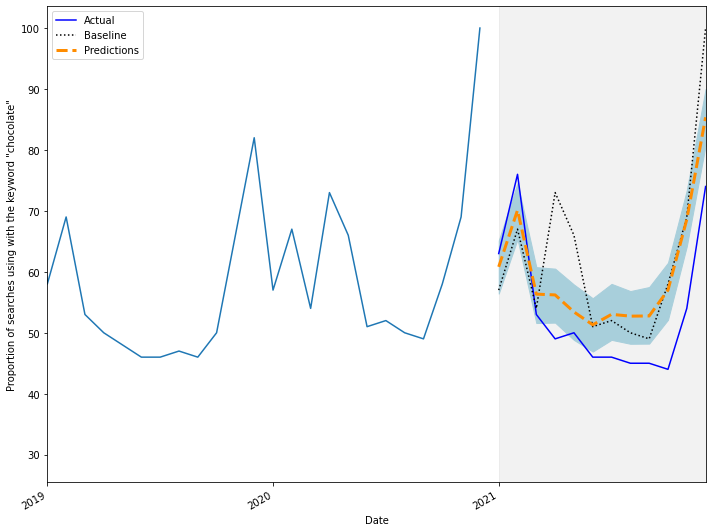

In [48]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['baseline'], 'k:', label='Baseline')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

ax.axvspan(204, 215, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(180, 215)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F15_peixeiro.png', dpi=300)

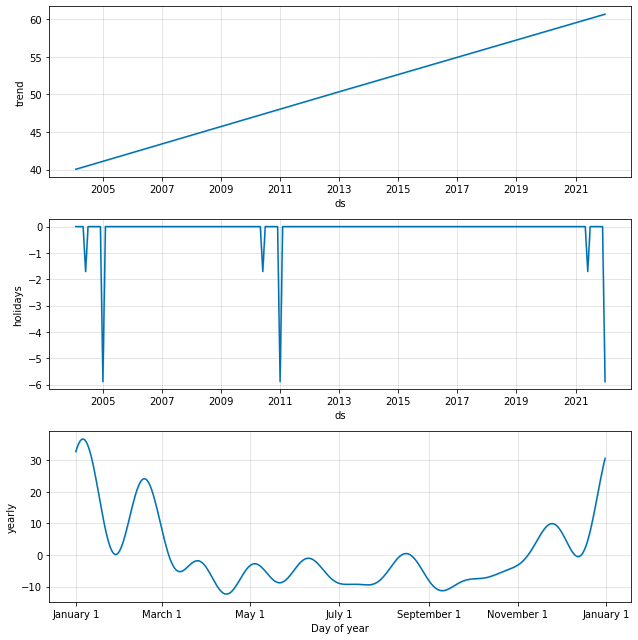

In [49]:
prophet_components_fig = m.plot_components(forecast)

plt.savefig('figures/CH19_F16_peixeiro.png', dpi=300)

### 19.5.2 Experiment: Can SARIMA do better? 

In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

In [51]:
ad_fuller_result = adfuller(df['y'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.0341743396012557
p-value: 0.2717927133166909


In [52]:
y_diff = np.diff(df['y'], n=1)

ad_fuller_result = adfuller(y_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.034710505102215
p-value: 6.058003360041225e-10


$d=1$, $D=0$ and $m=12$

In [53]:
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [54]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

order_list = list(product(ps, qs, Ps, Qs))

d = 1
D = 0
s = 12

In [55]:
SARIMA_result_df = optimize_SARIMAX(train['y'], None, order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

(p,q,P,Q)          AIC
0    (1, 1, 1, 1)  1127.746707
1    (1, 2, 1, 1)  1128.850440
2    (2, 1, 1, 1)  1129.398640
3    (1, 1, 1, 2)  1129.723792
4    (1, 1, 2, 1)  1129.727286
..            ...          ...
246  (1, 2, 0, 0)  1570.730422
247  (2, 1, 0, 0)  1570.732139
248  (0, 1, 0, 0)  1570.979692
249  (0, 2, 0, 0)  1571.866177
250  (0, 0, 0, 0)  1596.954153

[251 rows x 2 columns]

In [56]:
SARIMA_model = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -558.873
Date:                            Mon, 11 Dec 2023   AIC                           1127.747
Time:                                    22:08:28   BIC                           1144.313
Sample:                                         0   HQIC                          1134.449
                                            - 204                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3584      0.084      4.280      0.000       0.194       0.522
ma.L1         -0.8941      0.053   

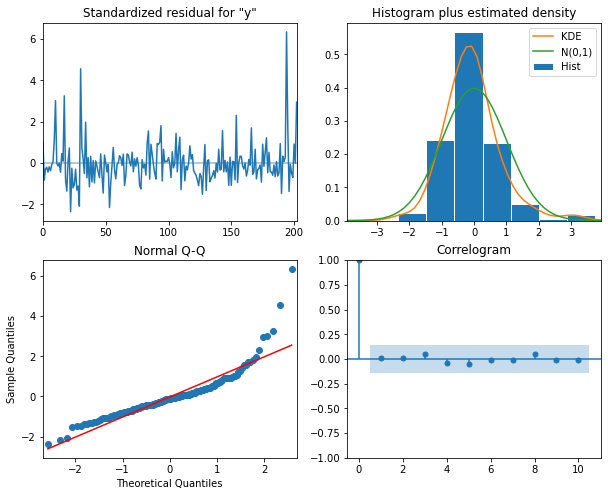

In [57]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH19_F17_peixeiro.png', dpi=300)

In [58]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


In [59]:
test

ds   y       yhat  yhat_lower  yhat_upper  baseline
204 2021-01-31  63  60.819361   56.422373   65.140803        57
205 2021-02-28  76  70.111059   65.344564   74.545583        67
206 2021-03-31  53  56.337831   51.596229   60.770301        54
207 2021-04-30  49  56.211589   51.664266   60.522103        73
208 2021-05-31  50  53.416744   48.822261   57.914591        66
209 2021-06-30  46  51.307883   46.915780   55.669891        51
210 2021-07-31  46  53.022367   48.836172   58.022166        52
211 2021-08-31  45  52.729368   48.191969   56.842398        50
212 2021-09-30  45  52.756094   48.220763   57.505648        49
213 2021-10-31  44  57.000209   52.130602   61.494953        58
214 2021-11-30  54  68.604956   64.184671   73.395053        69
215 2021-12-31  74  85.354511   80.753619   90.011659       100

In [60]:
SARIMA_pred = SARIMA_model_fit.get_prediction(204, 215).predicted_mean

test['SARIMA_pred'] = SARIMA_pred

test

ds   y       yhat  yhat_lower  yhat_upper  baseline  SARIMA_pred
204 2021-01-31  63  60.819361   56.422373   65.140803        57    66.618278
205 2021-02-28  76  70.111059   65.344564   74.545583        67    74.235278
206 2021-03-31  53  56.337831   51.596229   60.770301        54    59.770072
207 2021-04-30  49  56.211589   51.664266   60.522103        73    60.478181
208 2021-05-31  50  53.416744   48.822261   57.914591        66    58.442622
209 2021-06-30  46  51.307883   46.915780   55.669891        51    53.719197
210 2021-07-31  46  53.022367   48.836172   58.022166        52    55.006812
211 2021-08-31  45  52.729368   48.191969   56.842398        50    54.323002
212 2021-09-30  45  52.756094   48.220763   57.505648        49    54.600677
213 2021-10-31  44  57.000209   52.130602   61.494953        58    59.547104
214 2021-11-30  54  68.604956   64.184671   73.395053        69    71.493662
215 2021-12-31  74  85.354511   80.753619   90.011659       100    94.212002

In [61]:
SARIMA_mae = mean_absolute_error(test['y'], test['SARIMA_pred'])

print(SARIMA_mae)

10.081360786371425
